<a href="https://colab.research.google.com/github/ericodle/music_classification_project/blob/main/MFCC_intensive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This script shows the step-by-step processs to generate MFCCs from a wav file for later analysis. 

Some code borrowed from Chris Traile's "Mel Filterbanks And Mel Spectrograms" Jupyter notebook.

In [3]:
# Import dependencies. Install if necessary.
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [4]:
# Load in your wav file using Librosa. x represents the audio signal, and sr represents sample rate. 
# For google colab, drag-n-drop the file into the right side "Files" margin for temporary storage.
filepath = '/content/b.wav'
x, sr = librosa.load(filepath)

We will use the short-time version of the Fourier transform to generate an amplitude (dB) vs. frequency (Hz) graph.

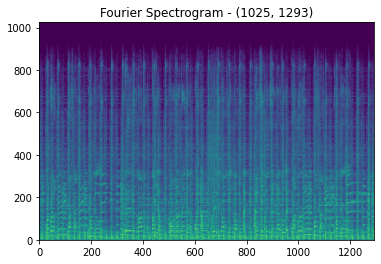

In [39]:
hop_length = 512
win_length = 2048
S = librosa.stft(x, hop_length=hop_length, win_length = win_length)
S = np.abs(S)
Sdb = librosa.amplitude_to_db(S,ref=np.max)
plt.imshow(Sdb, aspect='auto')
plt.title(f'Fourier Spectrogram - {S.shape}')
plt.gca().invert_yaxis()

Here is a coded example of where the Mel scale comes from Mels are a scale of frequency that is logarithmic with respect to the Hz scale. Mels are spaced to better fit data with the tendency of human hearing to lose resolution between tones as frequency increases.

(128, 1293)


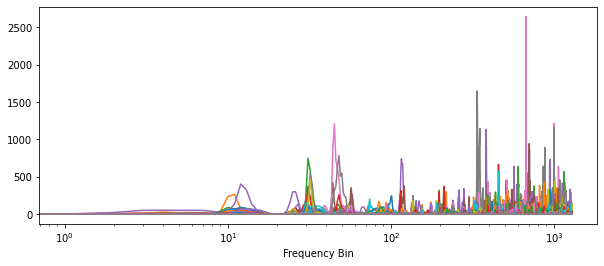

In [81]:
M = librosa.feature.melspectrogram(y=x, sr=sr)
print(M.shape)
plt.figure(figsize=(10, 4))
plt.plot(M.T)
plt.xlabel("Frequency Bin")
plt.gca().set_xscale('log')


We will matrix multiply the Mel Filterbank (128 x 1293) with the Fourier Spectrogram (1025 x 1293) to get our MFCCs. Matrix multiplication requires that the first dimension of one matrix be the same as the second dimension of the other matrix. Therefore, we must transpose one. I will transpose the filterbank so it fits the Fourier Spectrogram, because I'm not confident transposing the Fourier Spectrogram won't mess something up later.

In [88]:
M_trans = M.transpose()
print(M_trans.shape)

(1293, 128)


##FILTERBANK IS MESSED UP. FIXIT!

Text(0.5, 1.0, 'Mel Spectrogram (1025 x 128)')

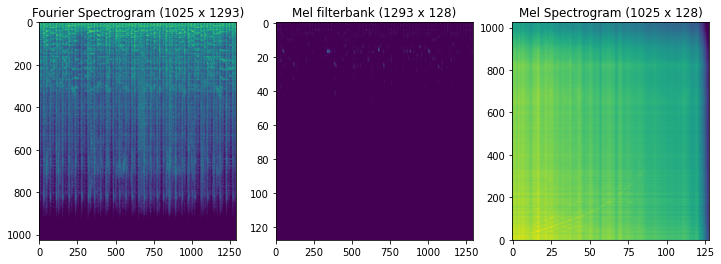

In [90]:

mel_specgram = np.log10(S.dot(M_trans))
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(Sdb, aspect='auto')
plt.gca().invert_yaxis()
plt.title("Fourier Spectrogram (1025 x 1293)".format(Sdb.shape[0], Sdb.shape[1]))

plt.gca().invert_yaxis()
plt.subplot(132)
plt.imshow(M, aspect='auto')
plt.title("Mel filterbank (1293 x 128)".format(M.shape[0], M.shape[1]))

plt.subplot(133)
plt.imshow(mel_specgram, aspect='auto')
plt.gca().invert_yaxis()
plt.title("Mel Spectrogram ({} x {})".format(mel_specgram.shape[0], mel_specgram.shape[1]))



Now that we have a Mel Spectrogram, we have to log it and take the Discrete Cosine Transform to get MFCCs.